In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from erddapy import ERDDAP
import json

Configure the ERDDAP to search

In [2]:
ra = 'neracoos'

with open('utils/ra_erddaps.json') as f:
    urls = json.load(f)

server = urls[ra.lower()]

print(server)

e = ERDDAP(server=server, protocol="tabledap")

http://www.neracoos.org/erddap


Pull in the processed inventory

In [3]:
#
# df_cruise = df[df['Station Description'] == 'Chesapeake Bay WQ Cruise Data ']
#
#df_aws = df[df['Station ID'] == 'Humboldt']
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/OMOECC_E1/OMOECC_E1.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/45186/45186.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/bgsusd2/bgsusd2.ncml'
# url = 'http://oos.soest.hawaii.edu/thredds/dodsC/hioos/nss/ns12agg'
# print(url)
# ds = xr.open_dataset(url)
# #ds = netCDF4.Dataset(url,'r')
# title = ds.title
# start_time = np.datetime_as_string(ds.time.min().values, unit='D')
# end_time = np.datetime_as_string(ds.time.max().values, unit='D')
# print('Duration: %s - %s' % (np.datetime_as_string(ds.time.min().values, unit='D'),
#                              np.datetime_as_string(ds.time.max().values, unit='D'))
#       )

# Try glos web server
# url = 'https://glbuoys.glos.us/tools/export?ftype=csv&data_type=buoy&units=eng&locs=OMOECC_E1&params=Water_Temperature_at_Surface|dissolved_oxygen_saturation|water_conductivity|ysi_turbidity&tperiod=custom&date_start=2020-01-01&date_end=2020-12-31&avg_ivld=none'
# df = erddapy.ERDDAP.to_pandas(url)

## using ERDDAP to look for stations
# check out http://data.glos.us/erddap/tabledap/allDatasets.htmlTable?datasetID%2Ctitle%2CminTime%2CmaxTime&maxTime%3E=2020-01-01&maxTime%3C=2020-12-31&orderBy(%22maxTime%22)
# that lists out all the GLOS stations with the maximum time of observations within the year 2020 (on their ERDDAP).

df = pd.read_excel('2021/data/processed/%s.xlsx' % ra.upper(), dtype=str)
df

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
0,NERACOOS,UCONN,44022,Execution Rocks,Moored buoy.,40.88,-73.73,moored_buoy,2004-09-01 00:00:00,Y,NERACOOS,Yp,University of Connecticut,academic,University of Connecticut,"University of Connecticut, Gulf of Maine Resea...","wind_speed, wind_to_direction, barometric_alti...",NaN
1,NERACOOS,UCONN,44040,Western Long Island Sound,Moored buoy.,40.95,-73.58,moored_buoy,2001-08-01 00:00:00,Y,NERACOOS,Yp,University of Connecticut,academic,University of Connecticut,"University of Connecticut, Gulf of Maine Resea...","wind_speed, wind_to_direction, barometric_alti...",NaN
2,NERACOOS,UCONN,44039,Central Long Island Sound,Moored buoy.,41.13,-72.65,moored_buoy,2002-02-01 00:00:00,Y,NERACOOS,Yp,University of Connecticut,academic,University of Connecticut,"University of Connecticut, Gulf of Maine Resea...","wind_speed, wind_to_direction, barometric_alti...",NaN
3,NERACOOS,UNH,"COOA GREAT_BAY - Great Bay, NH",Great Bay Buoy,Moored buoy.,43.07,-70.86,moored_buoy,2005-04-01 00:00:00,Y,NERACOOS,Yf,University of New Hampshire,academic,University of New Hampshire,"University of New Hampshire, Gulf of Maine Res...","sea_water_temperature, sea_water_salinity, mo...",NaN
4,NERACOOS,UNH,CMLN3,Coastal Marine Lab,Coastal monitoring station.,43.07,-70.7,fixed,2010-03-01 00:00:00,Y,"NERACOOS, NOAA OAP",Yp,University of New Hampshire,academic,University of New Hampshire,"University of New Hampshire, Gulf of Maine Res...","sea_water_temperature, sea_water_salinity, mol...",NaN
5,NERACOOS,Umaine A01,44029,Massachusetts Bay,SE of Gloucester,42.52,-70.56,moored_buoy,2001-08-01 00:00:00,Y,"NERACOOS, MWRA",Yp,University of Maine,academic,University of Maine,"University of Maine, Gulf of Maine Research In...","air_temperature, wind_speed, wind_from_directi...",NaN
6,NERACOOS,UNH,44073,Appledore Island - C02 Buoy,Moored buoy.,43.02,-70.54,moored_buoy,2006-04-01 00:00:00,Y,"NERACOOS, NOAA OAP",Yp,University of New Hampshire,academic,University of New Hampshire,"University of New Hampshire, Gulf of Maine Res...","wind_speed, wind_to_direction, wind_speed_of_g...",NaN
7,NERACOOS,Umaine B01,44030,Western Maine Shelf,East of Cape Neddick (York),43.18,-70.42,moored_buoy,2001-08-01 00:00:00,Y,NERACOOS,Yf,University of Maine,academic,University of Maine,"University of Maine, Gulf of Maine Research In...","air_temperature, wind_speed, wind_from_directi...",NaN
8,NERACOOS,WHG,44090,Cape Cod Bay Wave Buoy,CDIP wave buoy,41.84,-70.329,wave_buoy,2016-05-23 00:00:00,Y,"NERACOOS, MassDEP, USGS",Yp,Woods Hole Group,industry,Woods Hole Group,"Woods Hole Group, Gulf of Maine Research Insti...","sea_water_temperature, sea_surface_wave_signif...",NaN
9,NERACOOS,UNH,44098,Jeffrey's Ledge,CDIP wave buoy,42.8,-70.16,wave_buoy,2008-09-01 00:00:00,Y,NERACOOS,Yp,University of New Hampshire,academic,University of New Hampshire,"University of New Hampshire, Gulf of Maine Res...","sea_surface_wave_significant_height, sea_water...",NaN


Search the ERDDAP server for a single station of interest - more of a test

In [4]:
# df['Station ID'].loc[df['Station ID'].isna()] = df.loc[df['Station ID'].isna(),'Dataset ID']

# df['Station ID']

In [5]:
df_wf = df[df['Station ID'] == 'ioos:station:TCOON:076']

# for SCCOOS need to search for 'Station Long Name' as 'Station ID' is NA for most entries
search_for = df_wf['Station ID'].to_string()

search_url = e.get_search_url(search_for=search_for, response="csv")

try:
    resp = pd.read_csv(search_url)
    print(resp['Station ID'])
except:
    pass

Rip through all the datasets in the inventory and see if they exist on the RA erddap. Process checks the following order:

1. `Station ID`, then 
2. `Station Long Name`, then
3. `WMO ID or NWS/CMAN ID`

We first check if the value is `nan`. If so, we punt as that will return all datasets from the ERDDAP service.

In [6]:
not_found = []
found = dict()

exclude = ' -gliders'

search_order = ['Station Long Name', 'WMO ID or NWS/CMAN ID', 'Station ID']

for search1 in df[search_order[0]].astype(str):
    
    if search1 == "nan":
        print("punting with station long name = nan\n")
        not_found.append(search1)
        continue
    
    try:
        print('searching \"%s\" = \"%s\"' % (search_order[0], search1))
        search_url = e.get_search_url(search_for=search1+exclude, response="csv")
        resp = pd.read_csv(search_url)
        
        print("Found \"%s\": %s" % (search1,resp['Dataset ID'].values.tolist()))
        
        found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
        
    except:
        
        print('no dataset matching \"%s\"' % search1)
        search2 = df.loc[df[search_order[0]] == search1, search_order[1]].values.tolist()[0]
        
        if search2 == "nan":
                print("punting with %s = nan\n" % search_order[1])
                not_found.append(search1)
                continue
                
        try:
            
            print('searching \"%s\" = \"%s\"' % (search_order[1], search2))
            search_url = e.get_search_url(search_for=search2+exclude, response="csv")
            resp = pd.read_csv(search_url)
            print("Found \"%s\": %s" % (search2,resp['Dataset ID'].values.tolist()))
            
            found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
            
        except:

            search3 = str(df.loc[df[search_order[0]] == search1, search_order[2]].values.tolist()[0])
            
            if search3 == "nan":
                print("punting with \"%s\" = nan\n" % search_order[2])
                not_found.append(search1)
                continue
            
            try:
                print('searching \"%s\" = \"%s\"' % (search_order[2], station_wmo))
                search_url = e.get_search_url(search_for=search3+exclude, response="csv")
                resp = pd.read_csv(search_url)
                print("Found \"%s\": %s" % (search3,resp['Dataset ID'].values.tolist()))
                
                found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
                
            except:
                print("Couldn't find:", [search1, search2, search3])
                not_found.append(search1)
        
    print("\n")

searching "Station Long Name" = "Execution Rocks"
no dataset matching "Execution Rocks"
searching "WMO ID or NWS/CMAN ID" = "44022"
Couldn't find: ['Execution Rocks', '44022', 'UCONN']


searching "Station Long Name" = "Western Long Island Sound"
no dataset matching "Western Long Island Sound"
searching "WMO ID or NWS/CMAN ID" = "44040"
Couldn't find: ['Western Long Island Sound', '44040', 'UCONN']


searching "Station Long Name" = "Central Long Island Sound"
no dataset matching "Central Long Island Sound"
searching "WMO ID or NWS/CMAN ID" = "44039"
Couldn't find: ['Central Long Island Sound', '44039', 'UCONN']


searching "Station Long Name" = "Great Bay Buoy"
Found "Great Bay Buoy": ['UNH_GBB', 'GREAT_BAY_TS_corrected_nitrate_csv', 'A01_sbe16_trans_all']


searching "Station Long Name" = "Coastal Marine Lab"
Found "Coastal Marine Lab": ['UNH_CML', 'UNH_CML_realtime', 'UNH_CO2_realtime', 'UNH_GBB', 'GREEN_BAY_TS_corrected_nitrate_csv', 'URI_GBay_Suna', 'URI_GSOPier_Suna', 'WBTS_CFIN_2

Print the stations that we couldn't find.

In [7]:
len(not_found)

6

In [8]:
len(found)

9

In [21]:
df.loc[df[search_order[0]].isna()]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,erddap_not_avail,geometry


In [22]:
df[df[search_order[0]].isin(not_found)]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,erddap_not_avail,geometry
0,NERACOOS,UCONN,44022,Execution Rocks,Moored buoy.,40.88,-73.73,moored_buoy,2004-09-01 00:00:00,Y,NERACOOS,Yp,University of Connecticut,academic,University of Connecticut,"University of Connecticut, Gulf of Maine Resea...","wind_speed, wind_to_direction, barometric_alti...",NaN,True,POINT (-73.73000 40.88000)
1,NERACOOS,UCONN,44040,Western Long Island Sound,Moored buoy.,40.95,-73.58,moored_buoy,2001-08-01 00:00:00,Y,NERACOOS,Yp,University of Connecticut,academic,University of Connecticut,"University of Connecticut, Gulf of Maine Resea...","wind_speed, wind_to_direction, barometric_alti...",NaN,True,POINT (-73.58000 40.95000)
2,NERACOOS,UCONN,44039,Central Long Island Sound,Moored buoy.,41.13,-72.65,moored_buoy,2002-02-01 00:00:00,Y,NERACOOS,Yp,University of Connecticut,academic,University of Connecticut,"University of Connecticut, Gulf of Maine Resea...","wind_speed, wind_to_direction, barometric_alti...",NaN,True,POINT (-72.65000 41.13000)
6,NERACOOS,UNH,44073,Appledore Island - C02 Buoy,Moored buoy.,43.02,-70.54,moored_buoy,2006-04-01 00:00:00,Y,"NERACOOS, NOAA OAP",Yp,University of New Hampshire,academic,University of New Hampshire,"University of New Hampshire, Gulf of Maine Res...","wind_speed, wind_to_direction, wind_speed_of_g...",NaN,True,POINT (-70.54000 43.02000)
8,NERACOOS,WHG,44090,Cape Cod Bay Wave Buoy,CDIP wave buoy,41.84,-70.329,wave_buoy,2016-05-23 00:00:00,Y,"NERACOOS, MassDEP, USGS",Yp,Woods Hole Group,industry,Woods Hole Group,"Woods Hole Group, Gulf of Maine Research Insti...","sea_water_temperature, sea_surface_wave_signif...",NaN,True,POINT (-70.32900 41.84000)
9,NERACOOS,UNH,44098,Jeffrey's Ledge,CDIP wave buoy,42.8,-70.16,wave_buoy,2008-09-01 00:00:00,Y,NERACOOS,Yp,University of New Hampshire,academic,University of New Hampshire,"University of New Hampshire, Gulf of Maine Res...","sea_surface_wave_significant_height, sea_water...",NaN,True,POINT (-70.16000 42.80000)


In [11]:
#found.pop('HTLPWES')
found

{'Great Bay Buoy': {'Dataset ID': ['UNH_GBB',
   'GREAT_BAY_TS_corrected_nitrate_csv',
   'A01_sbe16_trans_all']},
 'Coastal Marine Lab': {'Dataset ID': ['UNH_CML',
   'UNH_CML_realtime',
   'UNH_CO2_realtime',
   'UNH_GBB',
   'GREEN_BAY_TS_corrected_nitrate_csv',
   'URI_GBay_Suna',
   'URI_GSOPier_Suna',
   'WBTS_CFIN_2005_2017',
   'M01_corrected_nitrate_csv',
   'L01_sbe37_all',
   'E01_sbe37_all',
   'F01_sbe37_all',
   'C02_sbe37_all',
   'J02_sbe37_all',
   'A01_sbe37_all',
   'URI_GBay_BottomSonde',
   'URI_168-MV_BottomSonde',
   'URI_169-QP_BottomSonde',
   'URI_GSOPier_ExoTop',
   'bob_erddap_test_A01_met',
   'URI_169-QP_SurfaceSonde',
   'URI_GBay_SurfaceSonde',
   'URI_NP_BottomSonde',
   'URI_PP_BottomSonde',
   'URI_CPoint_BottomSonde',
   'URI_NP_SurfaceSonde',
   'URI_PP_SurfaceSonde',
   'URI_168-MV_SurfaceSonde',
   'URI_CPoint_SurfaceSonde',
   'A01_optics_s_all',
   'A01_sbe16_trans_all',
   'J02_accelerometer_all',
   'L01_accelerometer_all',
   'E01_sbe16_trans

Check if the dataset has coverage for CY 2021

In [12]:
valid_datasets = []

for key in found:
    
    dataset_id = found[key]['Dataset ID']
    
    if len(dataset_id)>1:
        
        for dataset in dataset_id:
            
            e.dataset_id = dataset
    
            e.constraints = {
                 "time>=": "2021-01-01"
            }
        
            e.variables = ['time']
    
            try:
                df_data = e.to_pandas(parse_dates=True)
                valid_datasets.extend([key])
                
            except:
                pass

                #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

    else:
        
        e.dataset_id = dataset_id[0]
    
        e.constraints = {
                         "time>=": "2021-01-01"
                        }
        
        e.variables = ['time']
        
        try:
            
            df_data = e.to_pandas(parse_dates=True)

            valid_datasets.extend([key])

        except:
            pass

            #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

            
#for valid in sorted(set(valid_datasets)):
    
#     # drop qc vars
#     cols = [c for c in df_data.columns if 'qc' not in c]
#     cols = [c for c in cols if 'QARTOD' not in c]

#     df_data = df_data[cols]

#     # set index for plotting
#     df_data = df_data.set_index(df_data['time (UTC)'])

#     # plot
#     #df_data.plot(subplots=True, title=e.dataset_id,figsize=(20,20))

#     start_time = df_data['time (UTC)'].min()
#     end_time = df_data['time (UTC)'].max()

#     print('Dataset %s' % e.dataset_id)
#     print('Duration: %s - %s' % (start_time, end_time))

non_2021_datasets = found.keys() - sorted(set(valid_datasets))

print('Datasets without coverage for 2021:\n%s' % non_2021_datasets)

Datasets without coverage for 2021:
set()


Show me the inventory metadata about the invalid stations:

In [23]:
bad_stations = df.loc[(df[search_order[0]].isin(non_2021_datasets)) | df[search_order[0]].isin(not_found)]

df['erddap_not_avail'] = df[search_order[0]].isin(bad_stations[search_order[0]])

In [24]:
df['erddap_not_avail']

0      True
1      True
2      True
3     False
4     False
5     False
6      True
7     False
8      True
9      True
10    False
11    False
12    False
13    False
14    False
Name: erddap_not_avail, dtype: bool

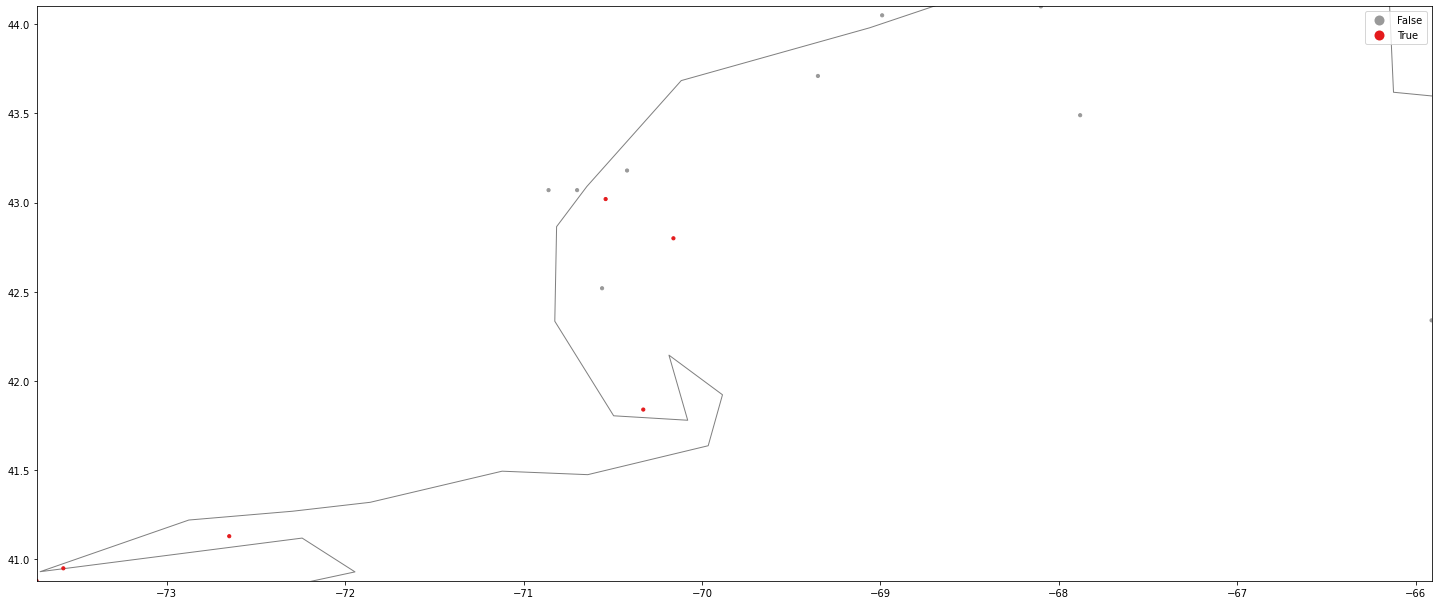

In [25]:
import geopandas
import matplotlib.pyplot as plt

#df = df.loc[df['']]

df.rename(columns=
{'Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].':
     'Variable Names',
 'Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)': 'Station Deployment',
 'Longitude (dec deg)': 'Longitude',
 'Latitude (dec deg)': 'Latitude'},
              inplace=True)

df['Station Deployment'] = \
    df['Station Deployment'].astype(str)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['Longitude'], df['Latitude']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='white', 
    edgecolor='grey', 
    figsize=(25,20),
    )

gdf.plot( ax=ax,
         column='erddap_not_avail', 
         categorical=True, 
         cmap = 'Set1_r',
         markersize=10, 
         legend=True,
         k=2,
        )



minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.show()

In [26]:
gdf_final = gdf.set_crs(epsg=4326)

gdf_final.explore('erddap_not_avail',cmap = 'Set1_r',)

In [27]:
gdf_final.loc[gdf_final['geometry'].is_empty == True]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,erddap_not_avail,geometry


In [18]:
# import urllib.request
# for url in gdf_final.loc[gdf_final['erddap_not_avail'],'Station Description'].str.replace('url: ',''):
#     print(url)
#     try:
#         urllib.request.urlopen(url).getcode()
#     except:
#         print("URL broken: %s" % url)
#         print(gdf_final.loc[gdf_final['Station Description'].str.contains(url,regex=False),'Station ID'])

In [28]:
df.shape

(15, 20)

In [29]:
gdf_final['Station Description'].astype(str)

0                         Moored buoy.
1                         Moored buoy.
2                         Moored buoy.
3                         Moored buoy.
4          Coastal monitoring station.
5                     SE of Gloucester
6                         Moored buoy.
7          East of Cape Neddick (York)
8                       CDIP wave buoy
9                       CDIP wave buoy
10                   SSE of Port Clyde
11    Between Owls Head and Vinalhaven
12                              Acadia
13                        Jordan Basin
14                South of Browns Bank
Name: Station Description, dtype: object